In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np

time: 268 ms (started: 2022-09-17 11:54:26 -07:00)


Parameters:

* `perplexity=30`
* `learning_rate="auto"`: `"auto"` means use the method of Belkina and co-workers which scaled the learning rate with the size of the dataset.
* `early_exaggeration_iter=250`
* `early_exaggeration=12`
* `n_iter=500`
* `exaggeration=None`: amount of exaggeration to apply during the non-early part of the iteration. Can give a more UMAP-like appearance.
* `dof=1`: degrees of freedom in the heavy-tail parameterization: `100` for SNE-like behavior. `0.5` gives noticeably compressed clusters.
* `theta=0.5`: amount of approximation when using Barnes-Hut (`negative_gradient_method="bh"`). `0` is exact t-SNE. Typical values 0.2-0.8. Can be set to `"auto"`.
* `n_interpolation_points=3`: an FFT setting. Don't touch it.
* `min_num_intervals=50`: another FFT setting. The higher the value, the more accurate the gradient calculation.
* `ints_in_interval=1`: grid size length in FFT. Lower is more accurate.
* `initialization="pca"`: one of `"pca"`, `"spectral"` or `"random"`. Or a matrix.
* `metric="euclidean"`: metric to use with one of the nearest neighbor methods.
* `metric_params=None`
* `initial_momentum=0.5`
* `final_momentum=0.8`
* `max_grad_norm=None`: clips the gradient norm.
* `max_step_norm=5`: clips the update step size.
* `n_jobs=1`: `-1` means use all processors.
* `neighbors="auto"`: one of: `"exact"`, `"annoy"`, `"pynndescent"`", `"hnsw"`, `"approx"` (`"annoy"` if possible, `"pynndescent"` otherwise) or `"auto"` (`"exact"` if `N < 1000` and `"approx"` otherwise).
* `negative_gradient_method="auto"`: one of: `"bh"` (Barnes-Hut), `"fft"` (FFT interpolation) or `"auto"` (BH if `N < 10000`, FFT otherwise).
* `callbacks=None`: one or a list of functors that implement `def callback(iteration, error, embedding):`
* `callbacks_every_iters=50`: number of iterations between the `callbacks` being called.
* `random_state=None`
* `verbose=False`

In [1]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("tsne"),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
)

[13:10:16] INFO     Getting dataset s1k                                                              ]8;id=337861;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=274840;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#37\37]8;;\

           INFO     Embedding                                                                        ]8;id=413724;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=354877;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#40\40]8;;\

           INFO     Using precomputed knn                                                                ]8;id=320577;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=78771;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#42\42]8;;\

           INFO     Using n_neighbors (no self) = 90 based on perplexity 30.00                           ]8;id=421912;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=53187;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#47\47]8;;\

           INFO     Found pre-calculated neighbors file: nn/s1k.150.euclidean.exact.faiss.idx.npy   ]8;id=514479;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=59438;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#235\235]8;;\

           INFO     Calculating affinity for perplexity 30.00                                            ]8;id=156709;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=552470;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#60\60]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=865715;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=818992;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

           INFO     Running t-SNE                                                                        ]8;id=708809;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=380127;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#74\74]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=783103;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=82809;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=146197;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=863810;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=433126;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=389525;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[13:10:17] INFO     Automatically determined negative gradient method `bh`                               ]8;id=826459;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=65113;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[13:10:19] INFO     Embedding completed                                                                  ]8;id=812969;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=995729;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#77\77]8;;\

           INFO     Evaluating                                                                       ]8;id=742910;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=180460;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#43\43]8;;\

           INFO     Random Triplet Evaluation num triplets per point: 5                              ]8;id=248446;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=168503;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=748238;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=512310;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.csv                                 ]8;id=520223;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=254236;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=578603;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=523460;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

           INFO     Random Pair Correlation num triplets per point: 5                                ]8;id=4036;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=802607;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=561318;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=585542;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.csv                                 ]8;id=966410;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=129908;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=855837;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=789462;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

           INFO     Neighbor Preservation for n_neighbors: [15, 50, 150] (excluding self)            ]8;id=504154;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=681773;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

[13:10:21] INFO     Plotting                                                                         ]8;id=332759;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=456069;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#46\46]8;;\

           INFO     Looking for pkl format from data/s1k-target-palette.pkl                         ]8;id=428835;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=481601;file:///home/james/dev/drnb/src/drnb/io/__init__.py#151\151]8;;\

           INFO     Exporting                                                                        ]8;id=875009;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=845407;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#49\49]8;;\

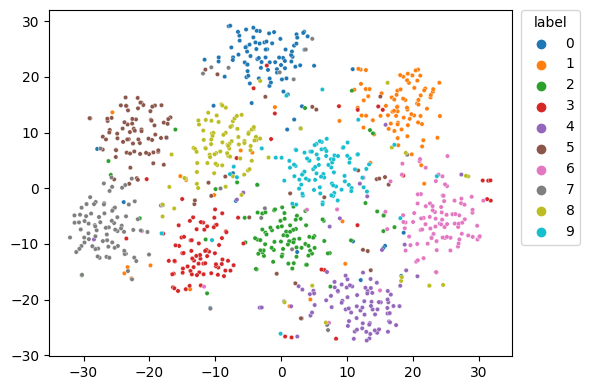

In [3]:
embed_result = embed_pipeline.run("s1k")

[13:11:49] INFO     Getting dataset s1k                                                              ]8;id=973057;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=713663;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#37\37]8;;\

           INFO     Embedding                                                                        ]8;id=546669;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=189040;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#40\40]8;;\

           INFO     Using precomputed knn                                                                ]8;id=186864;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=207237;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#42\42]8;;\

           INFO     Using n_neighbors (no self) = 90 based on perplexity 30.00                           ]8;id=537245;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=91213;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#47\47]8;;\

           INFO     Found pre-calculated neighbors file: nn/s1k.150.euclidean.exact.faiss.idx.npy   ]8;id=241960;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=288749;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#235\235]8;;\

           INFO     Calculating affinity for perplexity 30.00                                            ]8;id=882509;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=795414;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#60\60]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=101532;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=842952;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

           INFO     Using 'spectral' initialization                                                      ]8;id=731464;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=574360;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#66\66]8;;\

           INFO     Running t-SNE                                                                        ]8;id=606175;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=325936;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#74\74]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=663962;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=373871;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

[13:11:50] INFO     Automatically determined negative gradient method `bh`                               ]8;id=301269;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=121409;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[13:11:52] INFO     Automatically determined negative gradient method `bh`                               ]8;id=562662;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=251869;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[13:11:56] INFO     Embedding completed                                                                  ]8;id=522634;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=341632;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#77\77]8;;\

           INFO     Evaluating                                                                       ]8;id=408252;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=815180;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#43\43]8;;\

           INFO     Random Triplet Evaluation num triplets per point: 5                              ]8;id=737521;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=6858;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=248879;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=494121;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.csv                                 ]8;id=644364;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=48237;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=990384;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=887604;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

           INFO     Random Pair Correlation num triplets per point: 5                                ]8;id=415932;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=216688;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=488361;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=722298;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.csv                                 ]8;id=383822;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=872095;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=527032;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=725311;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

           INFO     Neighbor Preservation for n_neighbors: [15, 50, 150] (excluding self)            ]8;id=399851;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=420286;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Plotting                                                                         ]8;id=516053;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=670389;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#46\46]8;;\

           INFO     Looking for pkl format from data/s1k-target-palette.pkl                         ]8;id=293046;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=146004;file:///home/james/dev/drnb/src/drnb/io/__init__.py#151\151]8;;\

           INFO     Exporting                                                                        ]8;id=541788;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=652356;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#49\49]8;;\

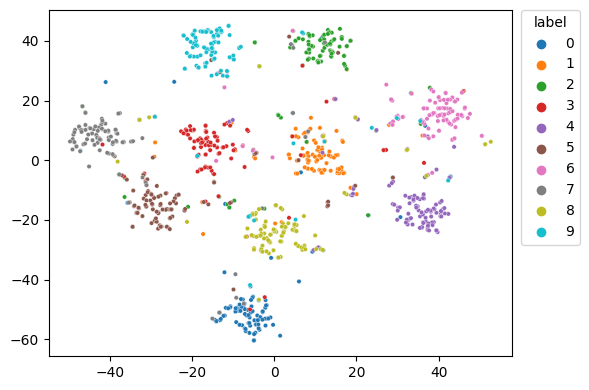

In [5]:
embed_result_spectral = pl.create_pipeline(
    method=pl.embedder("tsne", initialization="spectral", params=dict(dof=0.7)),
    eval_metrics=[
        "rte",
        "rpc",
        ("nnp", dict(n_neighbors=[15, 50, 150])),
    ],
    verbose=True,
    plot=dict(cex=10, alpha_scale=1, figsize=(6, 4), legend="force"),
).run("s1k")